# Introduction

Coronavirus or Covid-19 specifically is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The virus needs no introduction unless you've been living under a rock since the begining of 2020, but if you want to read more about it you can find more information here - [Wikipedia](https://en.wikipedia.org/wiki/Coronavirus_disease_2019), [The CDC website](https://www.cdc.gov/coronavirus/2019-ncov/index.html), [The WHO website](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen). Only trust news and updates from reliable sources because there's an absurd amount of misinformation being spread in the news and on social media.

This is an exploration of Covid-19 through data and visualizations to better understand and percieve the pandemic that has taken the world by storm

# Imports

In [1]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as FF

import math  
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import pycountry_convert
import calmap

from ipywidgets import interact
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.offline as po
po.init_notebook_mode(connected=True)

pd.options.display.float_format = '{:.2f}'.format

# Collect datasets

This exploration uses various datasets from the following sources -
1. [JHU CSSE GitHub](https://github.com/CSSEGISandData/COVID-19)
* [Oxford Covid-19 Government Response Tracker](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)
* [Our World in Data](https://ourworldindata.org/coronavirus)
* [World Development Indicators (WDI), World Bank](https://databank.worldbank.org/source/world-development-indicators)

We'll be analysing the number of confirmed cases over time alone with the number of deaths and recoveries

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_dead = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


# df.head()

In [4]:
# df_dead.head()

In [5]:
# df_rec.head()

In [6]:
df_group = df.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfd_group = df_dead.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
dfr_group = df_rec.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])

In [7]:
print("Confirmed")
display(df_group.head())
print()
print("Deaths")
display(dfd_group.head())

print("Recovered")
display(dfr_group.head())

Confirmed


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.94 67.71        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  \
0        0        0  ...   36710   36710   36747   36782   36829   36896   
1        0        0  ...    5396    5519    5620    5750    5889    6016   
2        0        0  ...   30950   31465   31972   32504   33055   33626   
3        0        0  ...     925     925     937     939     939     944   
4        0        0  ...    1164    1199    1280    1344    1395    1483   

   8/7/20  8/8/20  8/9/20  8/10/20  
0   37015   37054   37054    37162  
1    6151    6275    6411     6536  
2   34155   34693   35160    35712  
3     955     955     955      963  
4    1538    1572    1672     1679  

[5 rows x 205 columns]


Deaths


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.94 67.71        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  \
0        0        0  ...    1283    1284    1288    1288    1294    1298   
1        0        0  ...     161     166     172     176     182     188   
2        0        0  ...    1223    1231    1239    1248    1261    1273   
3        0        0  ...      52      52      52      52      52      52   
4        0        0  ...      54      55      58      59      62      64   

   8/7/20  8/8/20  8/9/20  8/10/20  
0    1307    1312    1312     1328  
1     189     193     199      200  
2    1282    1293    1302     1312  
3      52      52      52       52  
4      67      70      75       78  

[5 rows x 205 columns]

Recovered


Country/Region    Lat  Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0    Afghanistan  33.94 67.71        0        0        0        0        0   
1        Albania  41.15 20.17        0        0        0        0        0   
2        Algeria  28.03  1.66        0        0        0        0        0   
3        Andorra  42.51  1.52        0        0        0        0        0   
4         Angola -11.20 17.87        0        0        0        0        0   

   1/27/20  1/28/20  ...  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  8/6/20  \
0        0        0  ...   25509   25510   25669   25669   25742   25840   
1        0        0  ...    2961    3018    3031    3031    3123    3155   
2        0        0  ...   20988   21419   21901   22375   22802   23238   
3        0        0  ...     807     807     821     825     825     828   
4        0        0  ...     460     461     476     503     506     520   

   8/7/20  8/8/20  8/9/20  8/10/20  
0   25903   25960   25960    26228  
1    3227    3268    3342     3379  
2   23667   24083   24506    24920  
3     839     839     839      839  
4     544     564     567      569  

[5 rows x 205 columns]

In [8]:
last_date = df_group.columns.values[-1]

**Take the average for each metric as the cap for the heatmap**

In [9]:
avg = math.ceil(df_group[[last_date]].mean())
avg_dead = math.ceil(dfd_group[[last_date]].mean())
avg_rec = math.ceil(dfr_group[[last_date]].mean())

# display(df_group[[last_date]].describe())

# Covid 19 cases mapped

## Global confirmed cases

In [10]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = df_group['Country/Region'],
    z = df_group[last_date],
    text = df_group['Country/Region'],
    colorscale = 'Peach',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Confirmed cases',
    zmax = avg,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide confirmed cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

In [11]:
dates = df_group.columns[4:]

df_time = df_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')


In [12]:
df_time.head(10)

Country/Region     Lat    Long     Date  Confirmed
0          Afghanistan   33.94   67.71  1/23/20          0
1              Albania   41.15   20.17  1/23/20          0
2              Algeria   28.03    1.66  1/23/20          0
3              Andorra   42.51    1.52  1/23/20          0
4               Angola  -11.20   17.87  1/23/20          0
5  Antigua and Barbuda   17.06  -61.80  1/23/20          0
6            Argentina  -38.42  -63.62  1/23/20          0
7              Armenia   40.07   45.04  1/23/20          0
8            Australia -256.85 1130.84  1/23/20          0
9              Austria   47.52   14.55  1/23/20          0

## Increase in confirmed cases over time

In [13]:
fig = px.choropleth(df_time, locationmode = "country names",
                    locations = 'Country/Region',
                    color="Confirmed",
                    hover_name="Country/Region", 
                    color_continuous_scale='Peach',
                    range_color= [0, avg],
                    animation_frame="Date")

fig.update_layout(
    title_text='Covid 19 confirmed cases timeline',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()

## Global deaths

In [14]:
dfd_time = dfd_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Dead')

dfd_time.head()

Country/Region    Lat  Long     Date  Dead
0    Afghanistan  33.94 67.71  1/23/20     0
1        Albania  41.15 20.17  1/23/20     0
2        Algeria  28.03  1.66  1/23/20     0
3        Andorra  42.51  1.52  1/23/20     0
4         Angola -11.20 17.87  1/23/20     0

In [15]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfd_group['Country/Region'],
    z = dfd_group[last_date],
    text = dfd_group['Country/Region'],
    colorscale = 'Reds',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Deaths',
    zmax = avg_dead,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Global recoveries

In [16]:
dfr_time = dfr_group.melt(id_vars=[ 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

dfr_time.head()

Country/Region    Lat  Long     Date  Recovered
0    Afghanistan  33.94 67.71  1/23/20          0
1        Albania  41.15 20.17  1/23/20          0
2        Algeria  28.03  1.66  1/23/20          0
3        Andorra  42.51  1.52  1/23/20          0
4         Angola -11.20 17.87  1/23/20          0

In [17]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = dfr_group['Country/Region'],
    z = dfr_group[last_date],
    text = dfr_group['Country/Region'],
    colorscale = 'Greens',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Recovered',
    zmax = avg_rec,
    zmin = 0
))

fig.update_layout(
    title_text='Covid 19 worldwide recoveries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

# Continent Data

Split the data up by continent

In [18]:
df_country = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [19]:
df_country = df_country.drop(columns=['People_Tested', 'People_Hospitalized', 'Last_Update', 'Lat', 'Long_', 'UID'])
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia   21713.00  331.00   12144.00 9238.00          85.28   
1        Austria   22106.00  723.00   20010.00 1373.00         245.45   
2         Canada  122053.00 9034.00  108050.00 4970.00         322.42   
3          China   88906.00 4689.00   82247.00 1970.00           6.33   
4        Denmark   15135.00  620.00   13154.00 1361.00         261.30   

   Mortality_Rate ISO3  
0            1.52  AUS  
1            3.27  AUT  
2            7.40  CAN  
3            5.27  CHN  
4            4.10  DNK

In [20]:
def country_to_continent_code(country):
    try:
        return pycountry_convert.country_alpha2_to_continent_code(pycountry_convert.country_alpha3_to_country_alpha2(country))
    except :
        return 'Other'

In [21]:
code_to_continent = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'Other': 'Other'
}

In [22]:
# list(df_country['Country_Region'].apply(lambda x: country_to_continent_code(x))).count('na')
code = df_country['ISO3'].apply(lambda x: code_to_continent[country_to_continent_code(x)])
df_country[code == 'Other']


Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
68   Diamond Princess     712.00   13.00     651.00   48.00            nan   
92           Holy See      12.00    0.00      12.00    0.00        1483.31   
104            Kosovo   10419.00  341.00    6058.00 4020.00         575.52   
116        MS Zaandam       9.00    2.00        nan    7.00            nan   
172       Timor-Leste      25.00    0.00      24.00    1.00           1.90   
184    Western Sahara      10.00    1.00       8.00    1.00           1.67   

     Mortality_Rate ISO3  
68             1.83  NaN  
92             0.00  VAT  
104            3.27  XKS  
116           22.22  NaN  
172            0.00  TLS  
184           10.00  ESH

In [23]:
df_country['Continent'] = code
df_country.head()

Country_Region  Confirmed  Deaths  Recovered  Active  Incident_Rate  \
0      Australia   21713.00  331.00   12144.00 9238.00          85.28   
1        Austria   22106.00  723.00   20010.00 1373.00         245.45   
2         Canada  122053.00 9034.00  108050.00 4970.00         322.42   
3          China   88906.00 4689.00   82247.00 1970.00           6.33   
4        Denmark   15135.00  620.00   13154.00 1361.00         261.30   

   Mortality_Rate ISO3      Continent  
0            1.52  AUS      Australia  
1            3.27  AUT         Europe  
2            7.40  CAN  North America  
3            5.27  CHN           Asia  
4            4.10  DNK         Europe

In [24]:
df_country_group = df_country.groupby(['Continent']).sum().reset_index(level=['Continent'])
df_country_group['Mortality_Rate'] = 100 * df_country_group['Deaths'] / df_country_group['Confirmed']

In [25]:
df_country_group.sort_values('Confirmed', ascending=False, inplace = True)

In [26]:
df_country_group.style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

In [27]:
df_time['Date'] =pd.to_datetime(df_time.Date)
dfd_time['Date'] =pd.to_datetime(dfd_time.Date)
dfr_time['Date'] =pd.to_datetime(dfr_time.Date)

# Calendar Heatmap

Heatmaps of the **increase** in confirmed cases, deaths and recoveries over time

In [28]:
df_time.head()

Country/Region    Lat  Long       Date  Confirmed
0    Afghanistan  33.94 67.71 2020-01-23          0
1        Albania  41.15 20.17 2020-01-23          0
2        Algeria  28.03  1.66 2020-01-23          0
3        Andorra  42.51  1.52 2020-01-23          0
4         Angola -11.20 17.87 2020-01-23          0

In [29]:
df_cal = df_time.groupby('Date')['Confirmed'].sum().diff().reset_index()
df_cal = df_cal.set_index('Date')

In [30]:
dfr_cal = dfr_time.groupby('Date')['Recovered'].sum().diff().reset_index()
dfr_cal = dfr_cal.set_index('Date')

In [31]:
dfd_cal = dfd_time.groupby('Date')['Dead'].sum().diff().reset_index()
dfd_cal = dfd_cal.set_index('Date')

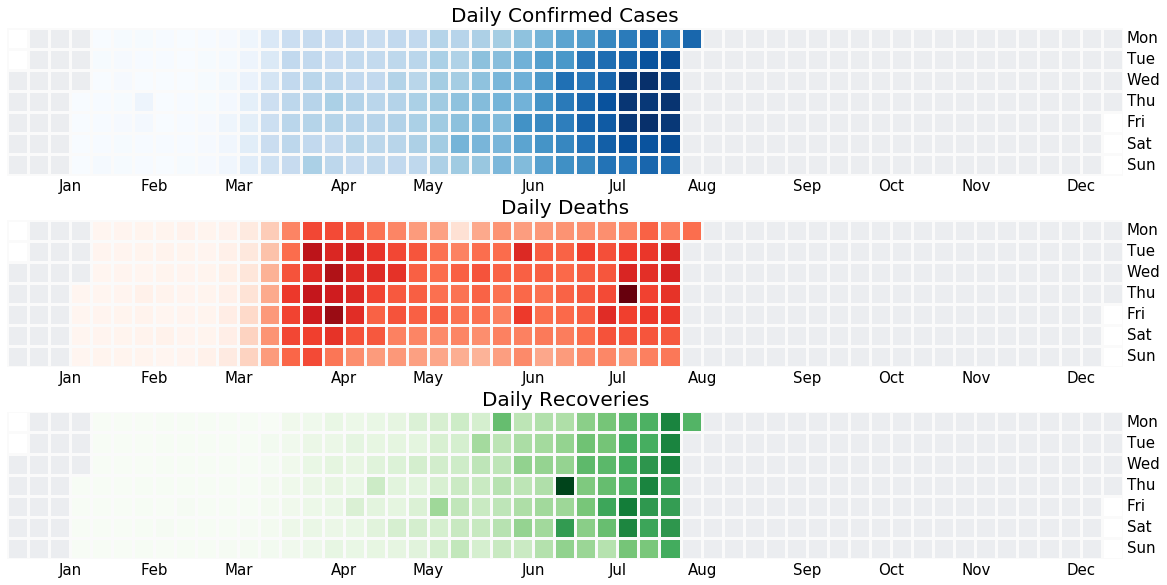

In [32]:
f = plt.figure(figsize=(20,10))
f.add_subplot(3,1,1)
calmap.yearplot(df_cal['Confirmed'], fillcolor='#ebedf0', cmap='Blues', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,2)
calmap.yearplot(dfd_cal['Dead'], fillcolor='#ebedf0', cmap='Reds', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(3,1,3)
calmap.yearplot(dfr_cal['Recovered'], fillcolor='#ebedf0', cmap='Greens', linewidth=2,linecolor="#fafafa",year=2020,)
plt.title("Daily Recoveries",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

In [33]:
all_days = pd.date_range('1/1/2020', '31/12/2020', freq='D')

In [34]:
dfc_latest = df_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Confirmed'})
dfd_latest = dfd_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Dead'})
dfr_latest = dfr_group[['Country/Region', 'Lat', 'Long', last_date]].rename(columns = {last_date:'Recovered'})

# dfd_latest

# Testing information

The number of tests carried out per country is an important metric to understand if certain countries have fewer cases simply because of a lack of extensive testing

In [35]:
testing = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

In [36]:
testing.head()

Entity        Date ISO code  \
0    Argentina - people tested  2020-02-11      ARG   
1  Argentina - tests performed  2020-02-11      ARG   
2    Argentina - people tested  2020-02-12      ARG   
3  Argentina - tests performed  2020-02-12      ARG   
4    Argentina - people tested  2020-02-13      ARG   

                                          Source URL             Source label  \
0  https://datos.gob.ar/dataset/salud-covid-19-ca...  Government of Argentina   
1  https://datos.gob.ar/dataset/salud-covid-19-de...  Government of Argentina   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN                      NaN   

  Notes  Daily change in cumulative total  Cumulative total  \
0   NaN                              2.00              2.00   
1   NaN                              2.00              2.00   
2   NaN                               nan               nan   
3   NaN                               nan               nan   
4   NaN                               nan               nan   

   Cumulative total per thousand  \
0                           0.00   
1                           0.00   
2                            nan   
3                            nan   
4                            nan   

   Daily change in cumulative total per thousand  7-day smoothed daily change  \
0                                           0.00                          nan   
1                                           0.00                          nan   
2                                            nan                          nan   
3                                            nan                          nan   
4                                            nan                          nan   

   7-day smoothed daily change per thousand  Short-term tests per case  \
0                                       nan                        nan   
1                                       nan                        nan   
2                                       nan                        nan   
3                                       nan                        nan   
4                                       nan                        nan   

   Short-term positive rate  
0                       nan  
1                       nan  
2                       nan  
3                       nan  
4                       nan

In [37]:
testing = testing[['Entity', 'Date', 'Cumulative total', 'Cumulative total per thousand']]
testing['Entity'] = testing['Entity'].apply(lambda x: x.split('-')[0].strip())

In [38]:
testing.replace('United States', 'US', inplace = True)
testing.replace('South Korea', 'Korea, South', inplace = True)
testing.replace('Myanmar', 'Burma', inplace = True)
testing.replace('Czech Republic', 'Czechia', inplace = True)
testing.replace('Taiwan', 'Taiwan*', inplace = True)

In [39]:
# set(testing['Entity'].unique())
# len(set(df_time['Country/Region'].unique()))
set(testing['Entity'].unique()) - set(df_time['Country/Region'].unique())


{'Democratic Republic of Congo', 'Hong Kong'}

In [40]:
testing['Date'] = pd.to_datetime(testing.Date)

In [41]:
testing = testing.rename(columns = {'Entity':'Country/Region'})

In [42]:
# testing_group = testing.groupby(['Country/Region']).sum().reset_index(level=['Country/Region'])
testing = testing.drop_duplicates(subset =['Country/Region', 'Date'], 
                     keep = 'first') 

In [43]:
# country = 'US'
# l_date = testing[testing['Country/Region'] == country]['Date'].max()
# int(testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total'])
lol = []
for country in set(testing['Country/Region'].unique()):
    l_date = testing[testing['Country/Region'] == country]['Date'].max()
    cumulative = testing[(testing['Country/Region'] == country) & (testing['Date'] == l_date)]['Cumulative total']
    if (not cumulative.isnull().values.any()):
        total = int(cumulative)
        thousand = np.round(float(testing[(testing['Country/Region'] == country) & 
                                       (testing['Date'] == l_date)]['Cumulative total per thousand']))
        lol.append([country, total, thousand])

In [44]:
latest_test = pd.DataFrame(lol, columns = ['Country/Region', 'Cumulative total', 'Total per thousand'])
latest_test.head()

Country/Region  Cumulative total  Total per thousand
0     Kazakhstan           2183308              116.00
1        Finland            408540               74.00
2     Costa Rica             87224               17.00
3         Brazil           2536552               12.00
4         Russia          30886160              212.00

In [45]:
testing_group = latest_test.merge(dfc_latest[['Country/Region', 'Confirmed']], on=['Country/Region'])\
[['Country/Region', 'Cumulative total', 'Confirmed',  'Total per thousand']]

In [46]:
testing_group["Positive"] = np.round(100*testing_group["Confirmed"]/testing_group["Cumulative total"],2)

## Cumulative Total

The `Total per thousand` column tells us how many tests have been done per thousand people in the population, the higher this number, the more extensive the testing.

The Positive Column is the rate at wich people are testing positive 

In [47]:
testing_group.dropna()\
            .sort_values(['Cumulative total', 'Total per thousand', 'Positive']
                         , ascending=False).head(20)\
            .style.background_gradient(cmap='Blues',subset=["Cumulative total"])\
            .background_gradient(cmap='Greens',subset=["Total per thousand"])\
            .background_gradient(cmap='Purples',subset=["Positive"])\
            .background_gradient(cmap='Reds',subset=["Confirmed"])\

#                         .background_gradient(cmap='Greens',subset=["confirmed"])\
#                         .background_gradient(cmap='Purples',subset=["deaths"])\
#                         .background_gradient(cmap='YlOrBr',subset=["MR"])\
#                         .background_gradient(cmap='bone_r',subset=["Positive"])

## Number of tests over time

In [48]:
top_l = list(testing_group.sort_values(['Cumulative total'], ascending=False).head(15)['Country/Region'])

fig = px.line(testing[[x in top_l for x in testing['Country/Region']]].sort_values(['Country/Region', 'Date']), 
              color_discrete_sequence= px.colors.cyclical.Edge,
              x="Date", y="Cumulative total", color="Country/Region")
fig.show()

# Time series analysis

In [49]:
df_comb = dfc_latest.merge(dfd_latest, 
                           on=['Country/Region', 'Lat', 'Long']).merge(dfr_latest, 
                                                                       on=['Country/Region', 'Lat', 'Long'])
df_comb.head()

Country/Region    Lat  Long  Confirmed  Dead  Recovered
0    Afghanistan  33.94 67.71      37162  1328      26228
1        Albania  41.15 20.17       6536   200       3379
2        Algeria  28.03  1.66      35712  1312      24920
3        Andorra  42.51  1.52        963    52        839
4         Angola -11.20 17.87       1679    78        569

In [50]:
df_time_comb = df_time.merge(dfd_time, 
                             on=['Country/Region', 'Lat', 'Long', 'Date']).merge(dfr_time, 
                                                                                 on=['Country/Region', 'Lat', 'Long', 'Date'])
df_time_comb['Active'] = df_time_comb['Confirmed'] - (df_time_comb['Recovered'] + df_time_comb['Dead'])
df_time_comb.head()

Country/Region    Lat  Long       Date  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.94 67.71 2020-01-23          0     0          0       0
1        Albania  41.15 20.17 2020-01-23          0     0          0       0
2        Algeria  28.03  1.66 2020-01-23          0     0          0       0
3        Andorra  42.51  1.52 2020-01-23          0     0          0       0
4         Angola -11.20 17.87 2020-01-23          0     0          0       0

In [51]:
df_time_comb_rad = df_time_comb.drop(columns = ['Confirmed'])

In [52]:
df_total_time = df_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
df_total_time = df_total_time.melt(id_vars="Date", 
                                   value_vars=['Dead', 'Recovered', 'Active'], 
                                   var_name='Status', value_name='Total')
# df_total_time.sort_values(by = 'Date', inplace=True)

In [53]:
col_seq = ['red', 'Green', 'orange']

## Total

### Line chart

In [54]:
df_total_time.head()

Date Status  Total
0 2020-01-23   Dead      0
1 2020-01-24   Dead      0
2 2020-01-25   Dead      0
3 2020-01-26   Dead      0
4 2020-01-27   Dead      0

In [55]:
fig = px.line(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [56]:
fig = px.area(df_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## China only

In [57]:
china_time_comb = df_time_comb[df_time_comb['Country/Region'] == 'China']
china_time_comb.head()

Empty DataFrame
Columns: [Country/Region, Lat, Long, Date, Confirmed, Dead, Recovered, Active]
Index: []

In [58]:
china_time_comb_rad = china_time_comb.drop(columns = ['Confirmed'])

In [59]:
china_total_time = china_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
china_total_time = china_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# china_total_time.sort_values(by = 'Date', inplace=True)

### Line chart

In [ ]:
fig = px.line(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [ ]:
fig = px.area(china_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

## Rest of the world excluding China

In [61]:
others_time_comb = df_time_comb[df_time_comb['Country/Region'] != 'China']
others_time_comb.head()

Country/Region    Lat  Long       Date  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.94 67.71 2020-01-23          0     0          0       0
1        Albania  41.15 20.17 2020-01-23          0     0          0       0
2        Algeria  28.03  1.66 2020-01-23          0     0          0       0
3        Andorra  42.51  1.52 2020-01-23          0     0          0       0
4         Angola -11.20 17.87 2020-01-23          0     0          0       0

In [62]:
others_time_comb_rad = others_time_comb.drop(columns = ['Confirmed'])

In [63]:
others_total_time = others_time_comb_rad.groupby('Date')['Dead', 'Recovered', 'Active'].sum().reset_index()
others_total_time = others_total_time.melt(id_vars="Date", 
                                         value_vars=['Dead', 'Recovered', 'Active'], var_name='Status', value_name='Total')
# others_total_time.sort_values(by = 'Date', inplace=True)

### Line Chart

In [64]:
fig = px.line(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

### Area Plot

In [65]:
fig = px.area(others_total_time, x="Date", y="Total", color_discrete_sequence = col_seq, color="Status")
fig.show()

# Ranking by country

In [66]:
df_country[['Country_Region', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']]\
                        .dropna()\
                        .sort_values(['Active', 'Confirmed', 'Recovered', 'Deaths', 'Mortality_Rate', 'Incident_Rate']
                                     , ascending=False).head(20)\
                        .style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Incident_Rate"])\
                        .background_gradient(cmap='Greys',subset=["Mortality_Rate"])

## Number of confirmed cases

In [67]:
df_comb['Active'] = df_comb['Confirmed'] - (df_comb['Dead'] - df_comb['Recovered'])

In [68]:
df_comb.head()

Country/Region    Lat  Long  Confirmed  Dead  Recovered  Active
0    Afghanistan  33.94 67.71      37162  1328      26228   62062
1        Albania  41.15 20.17       6536   200       3379    9715
2        Algeria  28.03  1.66      35712  1312      24920   59320
3        Andorra  42.51  1.52        963    52        839    1750
4         Angola -11.20 17.87       1679    78        569    2170

In [69]:
fig = px.bar(df_comb.sort_values('Confirmed').tail(15), x="Confirmed", color_discrete_sequence=['orange'],
             y="Country/Region", text='Confirmed', orientation='h')
fig.show()

## Number of deaths

In [70]:
fig = px.bar(df_comb.sort_values('Dead').tail(15), x="Dead", color_discrete_sequence=['red'],
             y="Country/Region", text='Dead', orientation='h')
fig.show()

## Number of recoveries

In [71]:
fig = px.bar(df_comb.sort_values('Recovered').tail(15), x="Recovered", color_discrete_sequence=['green'],
             y="Country/Region", text='Recovered', orientation='h')
fig.show()

## Number of active cases

In [72]:
fig = px.bar(df_comb.sort_values('Active').tail(15), x="Active", color_discrete_sequence=['#D63230'],
             y="Country/Region", text='Active', orientation='h')
fig.show()

## Mortality rates

In [73]:
df_comb['Mortality'] = round((df_comb['Dead']/df_comb['Confirmed'])*100, 2)

In [74]:
fig = px.bar(df_comb.sort_values('Mortality').tail(15), x="Mortality", y="Country/Region"
             , text='Mortality', orientation='h')
fig.show()

# Oxford COVID-19 Government Response Tracker

The Oxford COVID-19 Government Response Tracker is exactly what it sounds like, a record of steps taken by governments to curb the spread of Covid-19. From the [website](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker)-
> Governments are taking a wide range of measures in response to the COVID-19 outbreak. This tool aims to track and compare policy responses around the world, rigorously and consistently.

In [75]:
df_govres = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

In [76]:
df_govres.head()

CountryName CountryCode      Date  C1_School closing  C1_Flag  \
0       Aruba         ABW  20200101               0.00      nan   
1       Aruba         ABW  20200102               0.00      nan   
2       Aruba         ABW  20200103               0.00      nan   
3       Aruba         ABW  20200104               0.00      nan   
4       Aruba         ABW  20200105               0.00      nan   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                  0.00      nan                     0.00      nan   
1                  0.00      nan                     0.00      nan   
2                  0.00      nan                     0.00      nan   
3                  0.00      nan                     0.00      nan   
4                  0.00      nan                     0.00      nan   

   C4_Restrictions on gatherings  ...  StringencyIndex  \
0                           0.00  ...             0.00   
1                           0.00  ...             0.00   
2                           0.00  ...             0.00   
3                           0.00  ...             0.00   
4                           0.00  ...             0.00   

   StringencyIndexForDisplay  StringencyLegacyIndex  \
0                       0.00                   0.00   
1                       0.00                   0.00   
2                       0.00                   0.00   
3                       0.00                   0.00   
4                       0.00                   0.00   

   StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
0                             0.00                     0.00   
1                             0.00                     0.00   
2                             0.00                     0.00   
3                             0.00                     0.00   
4                             0.00                     0.00   

   GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
0                               0.00                    0.00   
1                               0.00                    0.00   
2                               0.00                    0.00   
3                               0.00                    0.00   
4                               0.00                    0.00   

   ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  0.00   
3                              0.00                  0.00   
4                              0.00                  0.00   

   EconomicSupportIndexForDisplay  
0                            0.00  
1                            0.00  
2                            0.00  
3                            0.00  
4                            0.00  

[5 rows x 42 columns]

In [77]:
# df_govres.info()

In [78]:
df_govres = df_govres[['CountryName', 'CountryCode', 'Date', 'StringencyIndex']].reindex()
# df_govres = df_govres[['CountryName', 'CountryCode', 'Date'
#                        , 'StringencyIndexForDisplay']].rename(columns = 
#                                                               {'StringencyIndexForDisplay':'StringencyIndex'}).reindex()

df_govres.head()

CountryName CountryCode      Date  StringencyIndex
0       Aruba         ABW  20200101             0.00
1       Aruba         ABW  20200102             0.00
2       Aruba         ABW  20200103             0.00
3       Aruba         ABW  20200104             0.00
4       Aruba         ABW  20200105             0.00

In [79]:
df_govres['Date'] = pd.to_datetime(df_govres['Date'], format='%Y%m%d')

In [80]:
df_govres.tail()

CountryName CountryCode       Date  StringencyIndex
41435  Pitcairn Islands         PCN 2020-08-07              nan
41436  Pitcairn Islands         PCN 2020-08-08              nan
41437  Pitcairn Islands         PCN 2020-08-09              nan
41438  Pitcairn Islands         PCN 2020-08-10              nan
41439  Pitcairn Islands         PCN 2020-08-11              nan

In [81]:
df_govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 4 columns):
CountryName        41440 non-null object
CountryCode        41440 non-null object
Date               41440 non-null datetime64[ns]
StringencyIndex    38920 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.3+ MB


In [82]:
len(df_govres['CountryName'].unique())

185

In [83]:
# df_govres = df_govres.ffill(axis = 0)

In [84]:
# df_govres = df_govres.dropna()

In [85]:
most_recent_date = df_govres['Date'].max()
first_date = df_govres['Date'].min()

print(first_date, most_recent_date)

2020-01-01 00:00:00 2020-08-11 00:00:00


In [86]:
dates = pd.date_range(start = first_date, end = most_recent_date)

In [87]:
countries = df_govres['CountryName'].unique()
lol = []
for country in tqdm(countries):
    for date in dates:
        res = df_govres[['CountryName','Date', 'StringencyIndex']][(df_govres['CountryName'] == country) &
                        (df_govres['Date'] == date)].values.tolist()
        if len(res) == 0:
            lol.append([country, date, np.nan])
        else:
            lol.append(res[0])

In [88]:
govres = pd.DataFrame(lol, columns = ['CountryName','Date', 'StringencyIndex']).ffill(axis = 0)
# govres = df_govres

In [89]:
govres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 3 columns):
CountryName        41440 non-null object
Date               41440 non-null datetime64[ns]
StringencyIndex    41440 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 971.4+ KB


In [90]:
govres_last= govres[govres['Date'] == most_recent_date]
govres_last.head()

CountryName       Date  StringencyIndex
223         Aruba 2020-08-11            32.41
447   Afghanistan 2020-08-11            78.70
671        Angola 2020-08-11            79.17
895       Albania 2020-08-11            59.26
1119      Andorra 2020-08-11            47.22

## Stringency Index

A map showing countries colored based on the Stringency index which is a score from 0-100 that tells us how stringent the government control methods are

In [91]:
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = govres_last['CountryName'],
    z = govres_last['StringencyIndex'],
    text = govres_last['CountryName'],
    colorscale = 'Blues',
    autocolorscale=False,
#     reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.2,
    colorbar_title = 'Response stringency %',
    zmax = 100,
    zmin = 0
))

fig.update_layout(
    title_text='Government response',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(255,255,255)',
        countrycolor = 'rgb(255,255,255)'
    )
)

fig.show()

## Government responses over time

Changes in the stringency index over time

In [92]:
govres['Date'] = govres['Date'].dt.strftime('%Y/%m/%d')

In [93]:
fig = px.choropleth(govres, locationmode = "country names",
                    locations = 'CountryName',
                    color="StringencyIndex",
                    hover_name="CountryName", 
                    color_continuous_scale='Blues',
                    range_color= [0, 100],
                    animation_frame="Date")

fig.update_layout(
    title_text='Government response to Covid 19',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        showland= True,
        showcountries = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth = 1,
        countrywidth = 1,
        subunitcolor = 'rgb(0,0,0)',
        countrycolor = 'rgb(0,0,0)'
    )
)


fig.show()